# Data Preprocessing

In [6]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from everywhereml.data import Dataset
from everywhereml.preprocessing import Pipeline, MinMaxScaler, Window, SpectralFeatures
path = "C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/dataset/final_df.csv"

In [7]:
df = pd.read_csv(path)
protocol_states = ['Base', 'TSST']
df = df[df['labels'].isin(protocol_states)]
mapping_dict = {'Base': 0,
                'TSST': 1}
df['labels'] = df['labels'].map(mapping_dict)
ID = df['ID'].reset_index(drop=True) #store id column for later usage
df.drop(['ID', 'Time'], inplace=True, axis = 1)
df.head()

,hr,temp,labels
420,75.563333,35.447233,0
421,75.570000,35.549821,0
422,75.573333,35.449041,0
423,75.593333,35.543187,0
424,75.643333,35.443003,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 420 to 104083
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hr      30000 non-null  float64
 1   temp    30000 non-null  float64
 2   labels  30000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 937.5 KB


## Lag Features

Lag features have been extracted from the binary dataset containing baseline and stress period only. A moving window of size 60 have been applied to extract spectral features of first order, then, the data have been scaled to match the same range. 

In [8]:
pipeline = Pipeline(name='Pipeline', steps=[
    Window(length=60, shift=1),
    SpectralFeatures(order=1),
    MinMaxScaler()
])

The table below shows the most important statistics of the lag features: the first most important thing to notice is that there aren't variable which contains zero variance, thus, all the variables should be considered to feed the ML algorithm.

In [9]:
data = Dataset.from_pandas(df = df, name = 'sequence_dataset', target_column = 'labels', target_name_column = 'labels')
data.apply(pipeline)
data.df.to_csv('C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/dataset/lag_data.csv', index=False)
data = pd.read_csv('C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/dataset/lag_data.csv')
ID = ID[30:-29] #removing initial and final values from the sequence, because of the moving window
data['ID'] = ID.reset_index(drop=True) #insert id column to later perform LOSO cross-validation
data.to_csv('C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/dataset/lag_data.csv', index=False)
data.describe()

,hr_maximum,hr_minimum,hr_abs_maximum,hr_abs_minimum,hr_mean,hr_abs_energy,hr_mean_abs_change,hr_cid_ce,temp_maximum,temp_minimum,temp_abs_maximum,temp_abs_minimum,temp_mean,temp_abs_energy,temp_mean_abs_change,temp_cid_ce,target,target_name,ID
count,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000,29941.000000
mean,0.452248,0.397205,0.452248,0.397205,0.443942,0.371623,0.146873,0.013909,0.588741,0.567991,0.588741,0.567991,0.579729,0.556630,0.072133,0.020187,0.373267,0.373267,7.084399
std,0.177441,0.176686,0.177441,0.176686,0.180546,0.180811,0.113536,0.071951,0.224120,0.226754,0.224120,0.226754,0.224348,0.225932,0.094063,0.084366,0.483680,0.483680,4.296679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.324485,0.278433,0.324485,0.278433,0.320371,0.246451,0.068190,0.000999,0.471165,0.431795,0.471165,0.431795,0.462537,0.433005,0.013589,0.000306,0.000000,0.000000,3.000000
50%,0.423631,0.368079,0.423631,0.368079,0.414635,0.332333,0.115503,0.002338,0.625855,0.609403,0.625855,0.609403,0.616261,0.587926,0.040606,0.001720,0.000000,0.000000,7.000000
75%,0.563401,0.493788,0.563401,0.493788,0.545945,0.462875,0.188758,0.005639,0.768525,0.743994,0.768525,0.743994,0.750679,0.728249,0.089621,0.006993,1.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000


In [10]:
data.head()

,hr_maximum,hr_minimum,hr_abs_maximum,hr_abs_minimum,hr_mean,hr_abs_energy,hr_mean_abs_change,hr_cid_ce,temp_maximum,temp_minimum,temp_abs_maximum,temp_abs_minimum,temp_mean,temp_abs_energy,temp_mean_abs_change,temp_cid_ce,target,target_name,ID
0,0.44192,0.447531,0.44192,0.447531,0.469939,0.384935,0.052254,0.000717,0.944060,0.928227,0.944060,0.928227,0.937919,0.930941,0.160912,0.019084,0.0,0,0
1,0.44192,0.447658,0.44192,0.447658,0.471027,0.385993,0.053366,0.000725,0.944060,0.928227,0.944060,0.928227,0.937961,0.930987,0.160423,0.018968,0.0,0,0
2,0.44192,0.447722,0.44192,0.447722,0.472097,0.387034,0.054231,0.000729,0.944667,0.928227,0.944667,0.928227,0.937979,0.931007,0.160134,0.018899,0.0,0,0
3,0.44192,0.448104,0.44192,0.448104,0.473156,0.388064,0.054478,0.000730,0.944667,0.928227,0.944667,0.928227,0.938063,0.931100,0.159399,0.018748,0.0,0,0
4,0.44192,0.449060,0.44192,0.449060,0.474201,0.389080,0.054046,0.000727,0.948555,0.928227,0.948555,0.928227,0.938160,0.931207,0.159405,0.018749,0.0,0,0


The correlation matrix shows that minimu, maximum and mean lag features for both group of features are highly correlated between each other. In addition, skin temperature contributes positively to the prediction of anxiety, BPM contributes negatively instead.

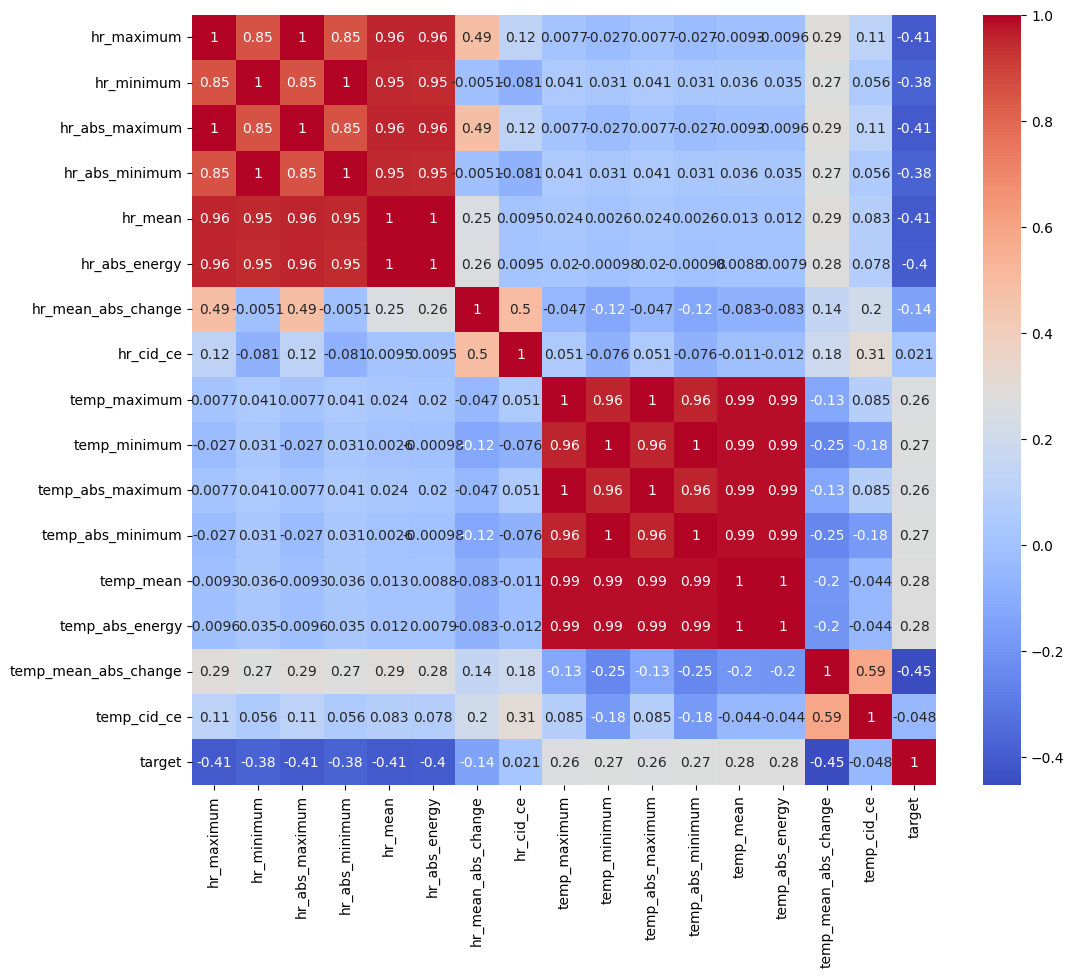

In [48]:
corr = data.iloc[:,:-2].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

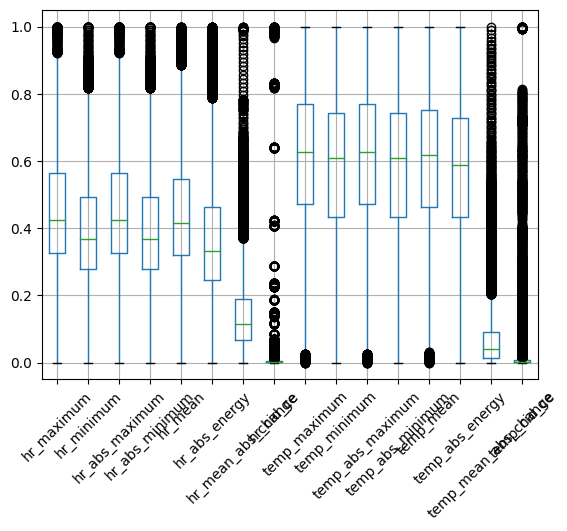

In [49]:
data.iloc[:,:-3].boxplot()
plt.xticks(rotation=45)
plt.show()

In [11]:
pipeline.to_arduino_file('C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/codes/arduinocode/Final_code/Scaler.h', instance_name='processor')

'#ifndef UUID2673475314272\n#define UUID2673475314272\n\n#include <cstring>\n\n\nnamespace Pipeline {\n\n    \n        #ifndef UUID2673475313312\n#define UUID2673475313312\n\n/**\n  * Window(length=60, shift=1)\n */\nclass Step0 {\n    public:\n\n        /**\n         * Transform input vector\n         */\n        bool transform(float *x) {\n            \n    // append x to queue\n    memcpy(queue + head, x, sizeof(float) * 2);\n    head += 2;\n\n    if (head != 120)\n        return false;\n\n    // copy queue to x and shift\n    memcpy(x, queue, sizeof(float) * 120);\n\n    \n        memcpy(queue, queue + 2, sizeof(float) * 118);\n    \n\n    head -= 2;\n\n\n\n            return true;\n        }\n\n    protected:\n        \n    uint16_t head = 0;\n    float queue[120] = {0};\n\n};\n\n\n\n#endif\n    \n        #ifndef UUID2673475314512\n#define UUID2673475314512\n\n/**\n  * SpectralFeatures(num_inputs=2, window_length=60, order=1, num_features=8)\n */\nclass Step1 {\n    public:\n\n   